# 532 Lec 2 - Building a basic Dash app

## Lecture learning goals

By the end of the lecture you will be able to:

1. Identify how a Dash app is designed conceptually
2. Run a Dash app on a local server
3. Create Dash html and widgets (dropdowns, sliders, etc)
4. Create an Altair plot in dash
5. Control an Altair plot via widgets

## Table of Contents

You can view the ToC by opening this in your local Jupyter Lab,
and downloading the ToC extension
by going to the Extension Manager tab in the left sidebar, searching for "toc", and clicking "install"
(I posted [a video about this on slack](https://ubc-mds.slack.com/archives/C24GEJS11/p1599940203406600) if you can't find the extension).

---

**Please download this notebook to be able to view the images**

Some of these sections have been copied and modified from [the dash documentation](https://dash.plotly.com/).

We're going to explain the basic logic of the dashboard before we start working with data.
This is because it can get a little messy to keep track of the overall app structure
when we have big chunks of data wrangling etc,
so we're starting out with short toy examples.

# The very minimal requirement for a dash app

```python
import dash
import dash_html_components as html


app = dash.Dash()
app.layout = html.Div('I am alive!!')
app.run_server()
```

If we save this as a file called `app.py`,
we can run it by typing `python app.py`.
This will serve a web page locally,
which you can view by navigating to the address `http://127.0.0.1:8050/`
in your browser,
which should look like this:

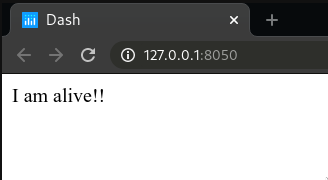

Congratulations,
you're now a dashboard developer!
However,
I would probably wait until after milestone 4
before you can comfortably put that line on your resume =)

Although the above is a functioning app,
there are a few more lines that we should add to our minimal skeleton.

```python
import dash
import dash_html_components as html


app = dash.Dash(__name__)

app.layout = html.Div('I am alive!!')

if __name__ == '__main__':
    app.run_server(debug=True)
```

`__name__` is an automatically created variable in Python
that holds the name of the currently running module.
This is `'__main__'` if we run the script directly with `python app.py`
and otherwise it is the name of the module.

Passing `__name__` to `dash.Dash()` is conventions
and sets the name of the Flask instance.
The last if statement is a check to make sure that `app.py` is being run as the main script and not imported from anothe rscript.
You can learn more about these concept in the material from 522 and 511,
especially lecture 4c from 511, 
starting around the 7:30 mark.

Adding `debug=True` makes sure that we capture any debugging output
and the app stops if we run into an error.
It also enable "hot reloading",
which means that as you make changes to the source file,
the dash/flask server will automatically detect that the source file have changed
and update the app,
without you having to relaunch it
(and usually without manually refreshing the browser).
This is very convenient for quick iteration.

# Configuring the layout

The layout in the dash app is a list of dash components laid out vertically.

## HTML elements

The Dash web application framework provides pure Python abstraction around HTML, CSS, and JavaScript.
That means that instead of writing HTML or using an HTML templating engine,
you compose your layout using Python structures with the `dash-html-components` library.

```python
app.layout = html.Div([
    html.H1('Hello Dash'),
    html.Div([
        html.P('Dash converts Python classes into HTML'),
        html.P("This conversion happens behind the scenes by Dash's JavaScript front-end")])])
```

which get converted into the following HTML (as you can see if you right-click and inspect the HTML of your app):

```html
<div>
    <h1>Hello Dash</h1>
    <div>
        <p>Dash converts Python classes into HTML</p>
        <p>This conversion happens behind the scenes by Dash's JavaScript front-end</p>
    </div>
</div>
```

With this change, our app now looks like this.

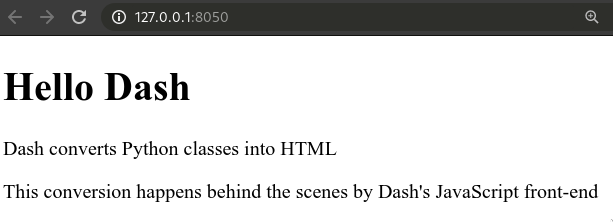

If you don't want your app to look like it is from the early 90s,
you can style your app with CSS.
While it is possible to write your own,
it is much easier to use a pre-made stylesheet by changing the initialization of your app to:

```python
app = dash.Dash(__name__, external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])
```

which fastforwads the looks of the app a couple of decades:

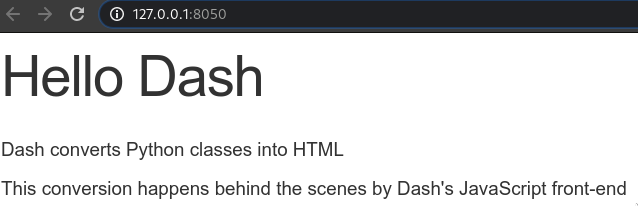

You can modify the stylesheet at that URL however you would like and save it as a different URL.
This is optional and should only be done after more important parts of your dashboard are taken care of.
You can [learn more about stylesheets for dash in the docs](https://dash.plotly.com/external-resources).

You can also style individual HTML components,
and set HTML properties such as class names, etc:

```python
app.layout = html.Div([
    html.Div('Hello blue dash', style={'color': 'blue', 'fontSize': 44}), 
    html.P('Hi there', id='my-para', style={'background-color':'red'})
], style={'marginTop': 50})
```

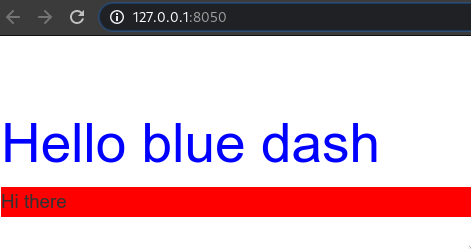

Another way of inserting whitespace would to use `html.Br()` in the layout list.

We will not cover everything you can do in HTML in this class,
and for your dashboards you likely don't need to change much at all,
but it is there if you want to
and you can read more about [all the available HTML components](https://dash.plotly.com/dash-html-components).

# Receiving input via Dash core components

The core components (or widgets) of dash
are those that enable you to create interactive user interfaces:
dropdowns, sliders, checkboxes, etc.
We will not go through all of these,
but cover to of the main ones so that you grok
how they work in general.
The dash documentation is an excellent source 
for finding [additional parameters and components,
such as text input, buttons, and date pickers](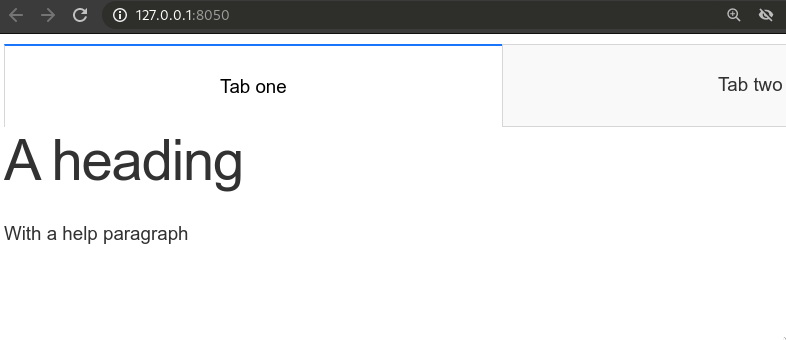).

## Sliders for numerical values

```python
import dash
import dash_core_components as dcc
import dash_html_components as html


app = dash.Dash(__name__)

app.layout = html.Div([
    'This is my slider',
    dcc.Slider(min=0, max=5, value=2, marks={0: '0', 5: '5'})])

if __name__ == '__main__':
    app.run_server(debug=True)
```

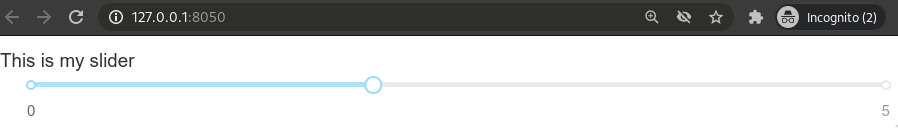

There is also the range slider for selecting a range of value instead of just one:

```python
dcc.RangeSlider(min=0, max=5, value=[1, 3], marks={0: '0', 5: '5'})
```

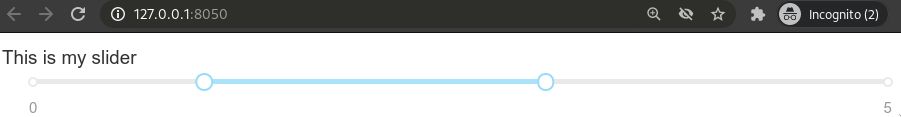

## Dropdowns for categorical values

Dropdowns are searchable and select a single value by default.

```python
app.layout = html.Div([
    'This is my dropdown',
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': 'San Francisco', 'value': 'SF'}],
        value='SF')]) 
```

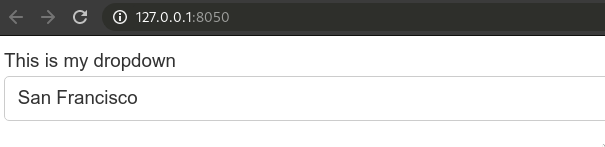

But can be changed to allow selection of multiple values.

```python
app.layout = html.Div([
    'This is my dropdown',
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': 'San Francisco', 'value': 'SF'}],
        value='SF', multi=True)]) 
```

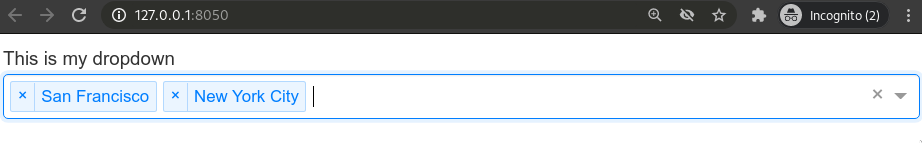

It can also be helpful to change the placeholder text as an indication to the user
when there is no selected value.

```python
app.layout = html.Div([
    'This is my dropdown',
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': 'San Francisco', 'value': 'SF'}],
            placeholder='Select a city...')]) 
```

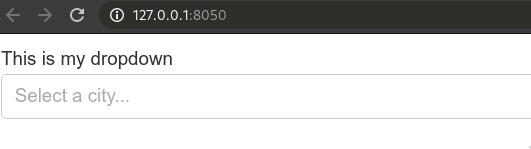

There are also checkboxes for multiple categorical values and radio buttons for single ones
that work similar.

# Taking action via Dash callbacks

So far we have seen how to layout our app
and how to receive input from the person using it.
But how can our app be updated after this input is received?
For this,
we need to "call back" to some function
with the updated values after a widget has been changed.
Dash callback functions are simply Python functions
that are automatically called by Dash whenever an input component's property changes.

The simplest such callback function
would do nothing else than returning the value of the input widget
and could look like this:

```python
def update_output(input_value):
    return input_value
```

But how do we link this function to a Dash widget
such as a dropdown or text input?
For this,
we can use a special decorator function that Dash provides.
You learned about decorator functions in 511,
but as a quick recap,
you can think of it as a function that modifies another function.
In this case,
the modification is that it links two functions together.
The Dash decorator function for callbacks is names `app.callback`
and if we add the decorator to our output function,
it would look like this:


```python
from dash.dependencies import Input, Output

@app.callback(
    Output('widget-2', 'value'),
    Input('widget-1', 'value'))
def update_output(input_value):
    return input_value
```

Now the input value of the `widget-1` would be linked to that of `widget-2`.
Let's create these widgets and see what this would look like in a complete app.
We will set the `id` parameter of the widgets
to identify which is for input
and which is for output.

```python
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Input(id='widget-1'),
    dcc.Textarea(id='widget-2')])

@app.callback(
    Output('widget-2', 'value'),
    Input('widget-1', 'value'))
def update_output(input_value):
    return input_value

if __name__ == '__main__':
    app.run_server(debug=True) 
```
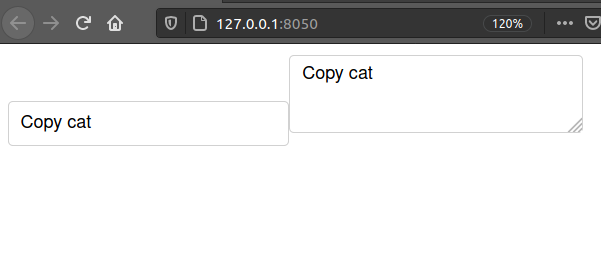

Everything I write in the input box to the left,
will now be copied into the text area box to the right.
Note that this is a one way interaction,
the left-most box will not update when I update the rightmost one.
Therefore,
I normally should not use and widgets that accept input
(such as textarea) as the output target,
which I have done in this simplified example.
More appropriate would be to use an HTML div
and update its `children` property when the input changes
(there is no `value` property for the div).

```python
app.layout = html.Div([
    dcc.Input(id='widget-1'),
    html.Div(id='widget-2')])

@app.callback(
    Output('widget-2', 'children'),
    Input('widget-1', 'value'))
def update_output(input_value):
    return input_value
```

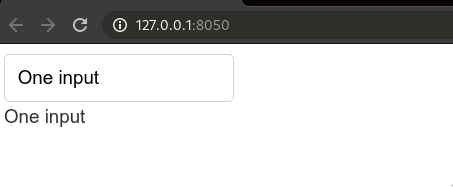

# Including plots

For native plotly charts,
there is a dash core component called `dcc.Graph`,
but this will not work for Altair or other non-plotly libraries.
Instead we will leverage the fact that Altair is built with web technologies
and use the `to_html()` method to include charts in iframes
(which are essentially nesting a HTML page within a page).
The only thing we're missing out on here really is that we can't
capture signals from Altair (for example when selecting points)
and use that info to update a dash widget (like a dropdown).
This is not a very common usage pattern,
and Altair does not have support for emitting these signals yet 
other than to other Altair plots (which we will see how to do later).

Let's start with a simple chart that you have seen before:

```python
import altair as alt
from vega_datasets import data


cars = data.cars()
chart = alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Weight_in_lbs')
```

To get the assigned `chart` variable to show up in Dash,
we will use it in an iframe like this.

```python
app.layout = html.Div([
        html.Iframe(srcDoc=chart.to_html())])
```

Together,
the app source code looks like this:


```python
import altair as alt
import dash
import dash_core_components as dcc
import dash_html_components as html
from vega_datasets import data


cars = data.cars()
chart = alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Displacement')

app = dash.Dash(__name__)
app.layout = html.Div([
        html.Iframe(srcDoc=chart.to_html())])

if __name__ == '__main__':
    app.run_server(debug=True) 
```

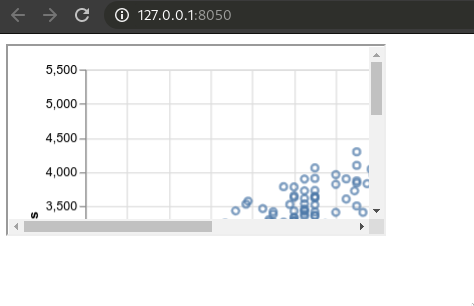

As you can see,
the size of the iframe is small by default
and there is a border around this.
We can fix these issues via the css styling parameter:

```python
app.layout = html.Div([
        html.Iframe(
            srcDoc=chart.to_html(),
            style={'border-width': '0', 'width': '100%', 'height': '400px'})])
```

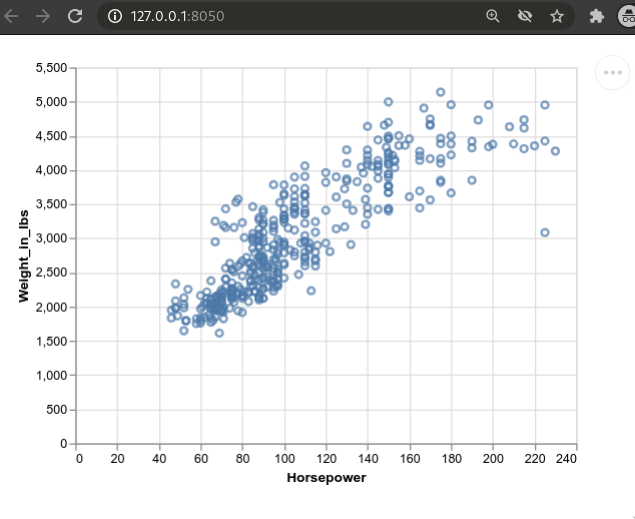

Now we can see the entire plot!
You can adjust the width and height parameters to fit with your dashboard layout.
They can be defined in either percentages or pixels,
but height doesn't always expand correctly for percentages.

How do we link this plot to a dash component such as a slider or dropdown?
We need to use the callback decorator again,
and because of that we need to define a function that creates the Altair plot:

```python
def plot_altair():
    chart = alt.Chart(cars).mark_point().encode(
        x='Horsepower',
        y='Weight_in_lbs')
    return chart.to_html()
```

We can now call this function in the iframe instead of passing the variable
and get the exact same output as before.

```python
app.layout = html.Div([
        html.Iframe(
            srcDoc=plot_altair(),
            style={'border-width': '0', 'width': '100%', 'height': '400px'})])
```

## Linking widgets with plots to enable interactive updates

### Control the xrange with a slider

To add the interactivity,
let's start with a slider
to filter the values of the data.
To be able to link the slider to the iframe,
we need to give both of them an `id`
and write a callback function that links them together.
The target that we want to replace in the iframe is the Altair plot,
so we will target the `srcDoc` parameter.
We will also update the plot creation function to accept
one argument and filter the cars data set based on the value in the slider.
The final app looks like this:

```python
import altair as alt
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from vega_datasets import data

    
cars = data.cars()

def plot_altair(xmax):
    chart = alt.Chart(cars[cars['Horsepower'] < xmax]).mark_point().encode(
        x='Horsepower',
        y='Weight_in_lbs')
    return chart.to_html()

app = dash.Dash(__name__, external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])

app.layout = html.Div([
        html.Iframe(
            id='scatter',
            srcDoc=plot_altair(xmax=0),
            style={'border-width': '0', 'width': '100%', 'height': '400px'}),
        dcc.Slider(id='xslider', min=0, max=240)])
        
@app.callback(
    Output('scatter', 'srcDoc'),
    Input('xslider', 'value'))
def update_output(xmax):
    return plot_altair(xmax)

if __name__ == '__main__':
    app.run_server(debug=True) 
```

As we drag the slider to higher values,
the max value of the x-axis in the plot increases
and more points are included.

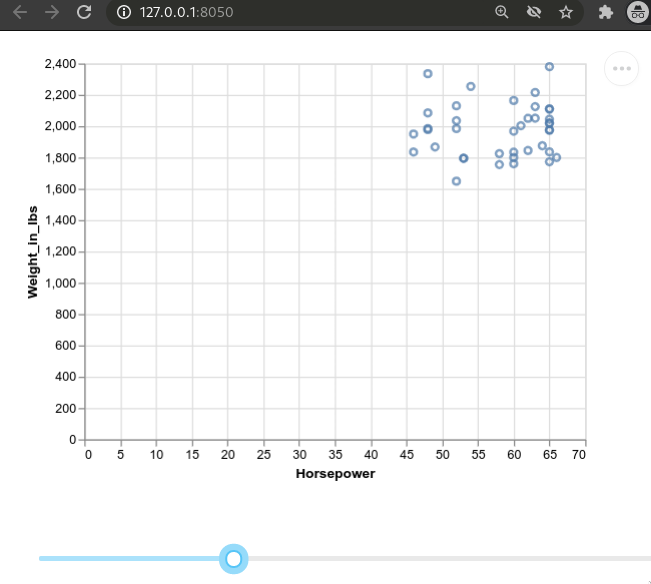

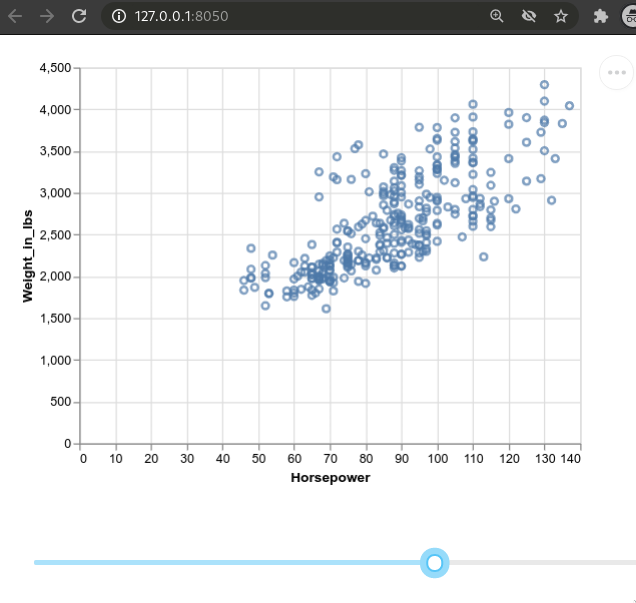

It might look odd that `cars` is not passed explicitly to the `plot_altair` function.
In general,
Python encourages you to be explicit rather than implicit.
You could do this by defining an optional argument in the function,
wich is a copy of the `cars` dataframe
(without `.copy()` you will modify the `cars` dataframe
when you modify `df`):

```python
def plot_altair(xcol, df=cars.copy()):
    chart = alt.Chart(df).mark_point().encode(
        x=xcol,
        y='Displacement',
        tooltip='Horsepower').interactive()
    return chart.to_html()
```

However,
it seems to be more common to work with the global dataframe,
at least from what I have seen in the docs and examples.
Either is technically fine,
as long as you avoid modifying the global `cars` dataframe
inside a function.
**This is important**,
and we will talk more about it next week,
but you can [read about modifying global variables in the docs](https://dash.plotly.com/sharing-data-between-callbacks#why-global-variables-will-break-your-app)
if you are interested now already.

### Controlling the x-axis column with a dropdown

The process for linking a dropdown is very similar to linking a slider.
Things to note here are that we are now changing which column is used for the xaxis
rather than the range of the x-axis,
and we are setting the options of the dropdown automatically
via a list comprehension with a dictionary.
Compare with the manual way of setting the options that we went through in the beginning,
it would be tedious to do this for all values in the dataframe,
which is why we autopopulate it instead.

```python
import altair as alt
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from vega_datasets import data


cars = data.cars()

def plot_altair(xcol):
    chart = alt.Chart(cars).mark_point().encode(
        x=xcol,
        y='Displacement',
        tooltip='Horsepower').interactive()
    return chart.to_html()

app = dash.Dash(__name__, external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])

app.layout = html.Div([
        dcc.Dropdown(
            id='xcol', value='Horsepower',
            options=[{'label': i, 'value': i} for i in cars.columns]),
        html.Iframe(
            id='scatter',
            style={'border-width': '0', 'width': '100%', 'height': '400px'},
            srcDoc=plot_altair(xcol='Horsepower'))])

@app.callback(
    Output('scatter', 'srcDoc'),
    Input('xcol', 'value'))
def update_output(xcol):
    return plot_altair(xcol)

if __name__ == '__main__':
    app.run_server(debug=True) 
```

The plotted column now changes as we use the dropdown

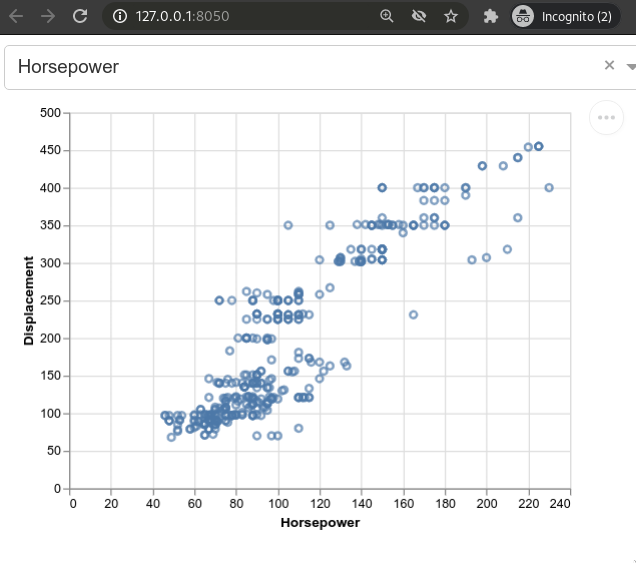

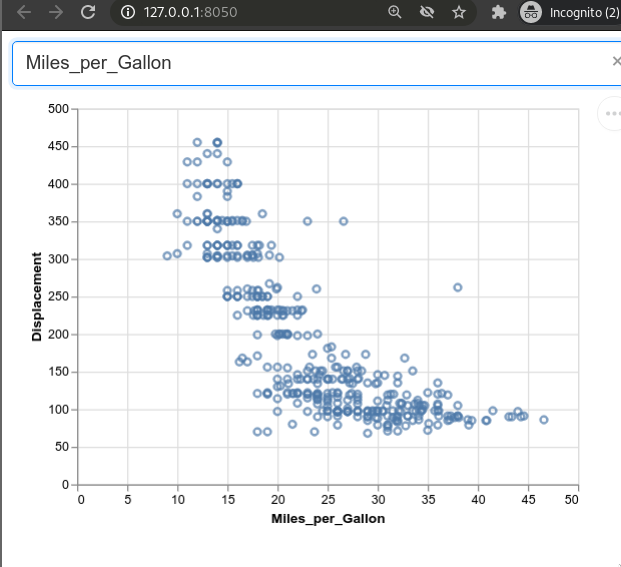

## Simplifying the callbacks when using an Iframe

The above works perfectly fine,
but it feels a bit inelegant
to have a separate function just for the callback decorator.
The reason for this above is that we set `srcDoc` to `plot_altair()`,
so we need this function to be defined before the iframe is referenced.
We could work around this
by not specifying any argument to the `srcDoc` parameter
when creating the Iframe:

```python
html.Iframe(
    id='scatter',
    style={'border-width': '0', 'width': '100%', 'height': '400px'}),
```

Now we could move the `plot_altair()` function down under the `app.layout`
and use the callback decorator directly on this function 
instead of having a separate `update_output` function:

```python
@app.callback(
    Output('scatter', 'srcDoc'),
    Input('xcol-widget', 'value'))
def plot_altair(xcol):
    chart = alt.Chart(cars).mark_point().encode(
        x=xcol,
        y='Displacement',
        tooltip='Horsepower').interactive()
    return chart.to_html()
```

This looks neater,
and is more similar to how dash is used with plotly
where the iframe is not needed.
But we have one big issue.
The first time the app loads,
the iframe will be empty 
and it will not show an Altair plot
until the dropdown is used to select a value.
This is not good because we often want our app to tell a story by default.
Luckily it is easy to fix.
We can trigger a callback from the dropdown
by setting its default value,
which will act just as if we had clicked it manually
and call the function that creates the Altair plot!

Our full app now looks like this:

```python
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import altair as alt
from vega_datasets import data


# Read in global data
cars = data.cars()

# Setup app and layout/frontend
app = dash.Dash(__name__,  external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])
app.layout = html.Div([
    html.Iframe(
        id='scatter',
        style={'border-width': '0', 'width': '100%', 'height': '400px'}),
    dcc.Dropdown(
        id='xcol-widget',
        value='Horsepower',  # REQUIRED to show the plot on the first page load
        options=[{'label': col, 'value': col} for col in cars.columns])])

# Set up callbacks/backend
@app.callback(
    Output('scatter', 'srcDoc'),
    Input('xcol-widget', 'value'))
def plot_altair(xcol):
    chart = alt.Chart(cars).mark_point().encode(
        x=xcol,
        y='Displacement',
        tooltip='Horsepower').interactive()
    return chart.to_html()

if __name__ == '__main__':
    app.run_server(debug=True)
```

The comments explain what each section is for,
and are worth keeping in mind for developing your own app.
The reason we load the data first
is that it is often used in the app layout,
for example to populate the options of the dropdown.
**This is the app skeleton I recommend using for your project**,
but remember that it is possile to use what we did first also
in case you need to workaround some particularity
with how you want your app to work.